In [1]:
#Monte le google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importer la bibliothèque pandas et configurer l'environnement pour faciliter l'affichage des résultats

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width',80)
pd.set_option('display.max_columns',10)

# Importation de fichiers CSV

# Lire le fichier de données, définir de nouveaux noms pour les rubriques et analyser la colonne de date

- Passer 1 à skiprows pour sauter la première ligne.
- Utiliser parse_dates pour créer une colonne datetime
- Mettre low_memory à False pour réduire l'utilisation de la mémoire pendant l'importation

In [3]:
landtemps = pd.read_csv('/content/drive/MyDrive/Labs_Data_Prep_2025_IA/lab/landtempssample.csv',
    names=['stationid','year','month','avgtemp','latitude',
      'longitude','elevation','station','countryid','country'],
    skiprows=1,
    parse_dates=[['month','year']], #Pour mettre ensemble month_year
    low_memory=False)

<ipython-input-3-74366d9220b1>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  landtemps = pd.read_csv('/content/drive/MyDrive/Labs_Data_Prep_2025_IA/lab/landtempssample.csv',
<ipython-input-3-74366d9220b1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  landtemps = pd.read_csv('/content/drive/MyDrive/Labs_Data_Prep_2025_IA/lab/landtempssample.csv',


In [4]:
landtemps

,month_year,stationid,avgtemp,latitude,longitude,elevation,station,countryid,country
0,2000-04-01,USS0010K01S,5.27,39.90,-110.75,"2,773.70",INDIAN_CANYON,US,United States
1,1940-05-01,CI000085406,18.04,-18.35,-70.33,58.00,ARICA,CI,Chile
2,2013-12-01,USC00036376,6.22,34.37,-91.12,61.00,SAINT_CHARLES,US,United States
3,1963-02-01,ASN00024002,22.93,-34.28,140.60,65.50,BERRI_IRRIGATION,AS,Australia
4,2001-11-01,ASN00028007,NaN,-14.78,143.50,79.40,MUSGRAVE,AS,Australia
...,...,...,...,...,...,...,...,...,...
99995,1991-04-01,MXXLT347415,29.02,17.78,-96.31,65.00,VALLE_NACIONAL_VALLE,MX,Mexico
99996,1991-11-01,RSM00032287,-2.81,57.08,156.70,3.00,UST_HAIRYUZOVO,RS,Russia
99997,1937-04-01,ARM00087166,19.42,-27.45,-58.76,61.90,CORRIENTES,AR,Argentina
99998,1958-10-01,CA006137361,10.02,42.78,-81.17,236.00,ST_THOMAS,CA,Canada


<Axes: >

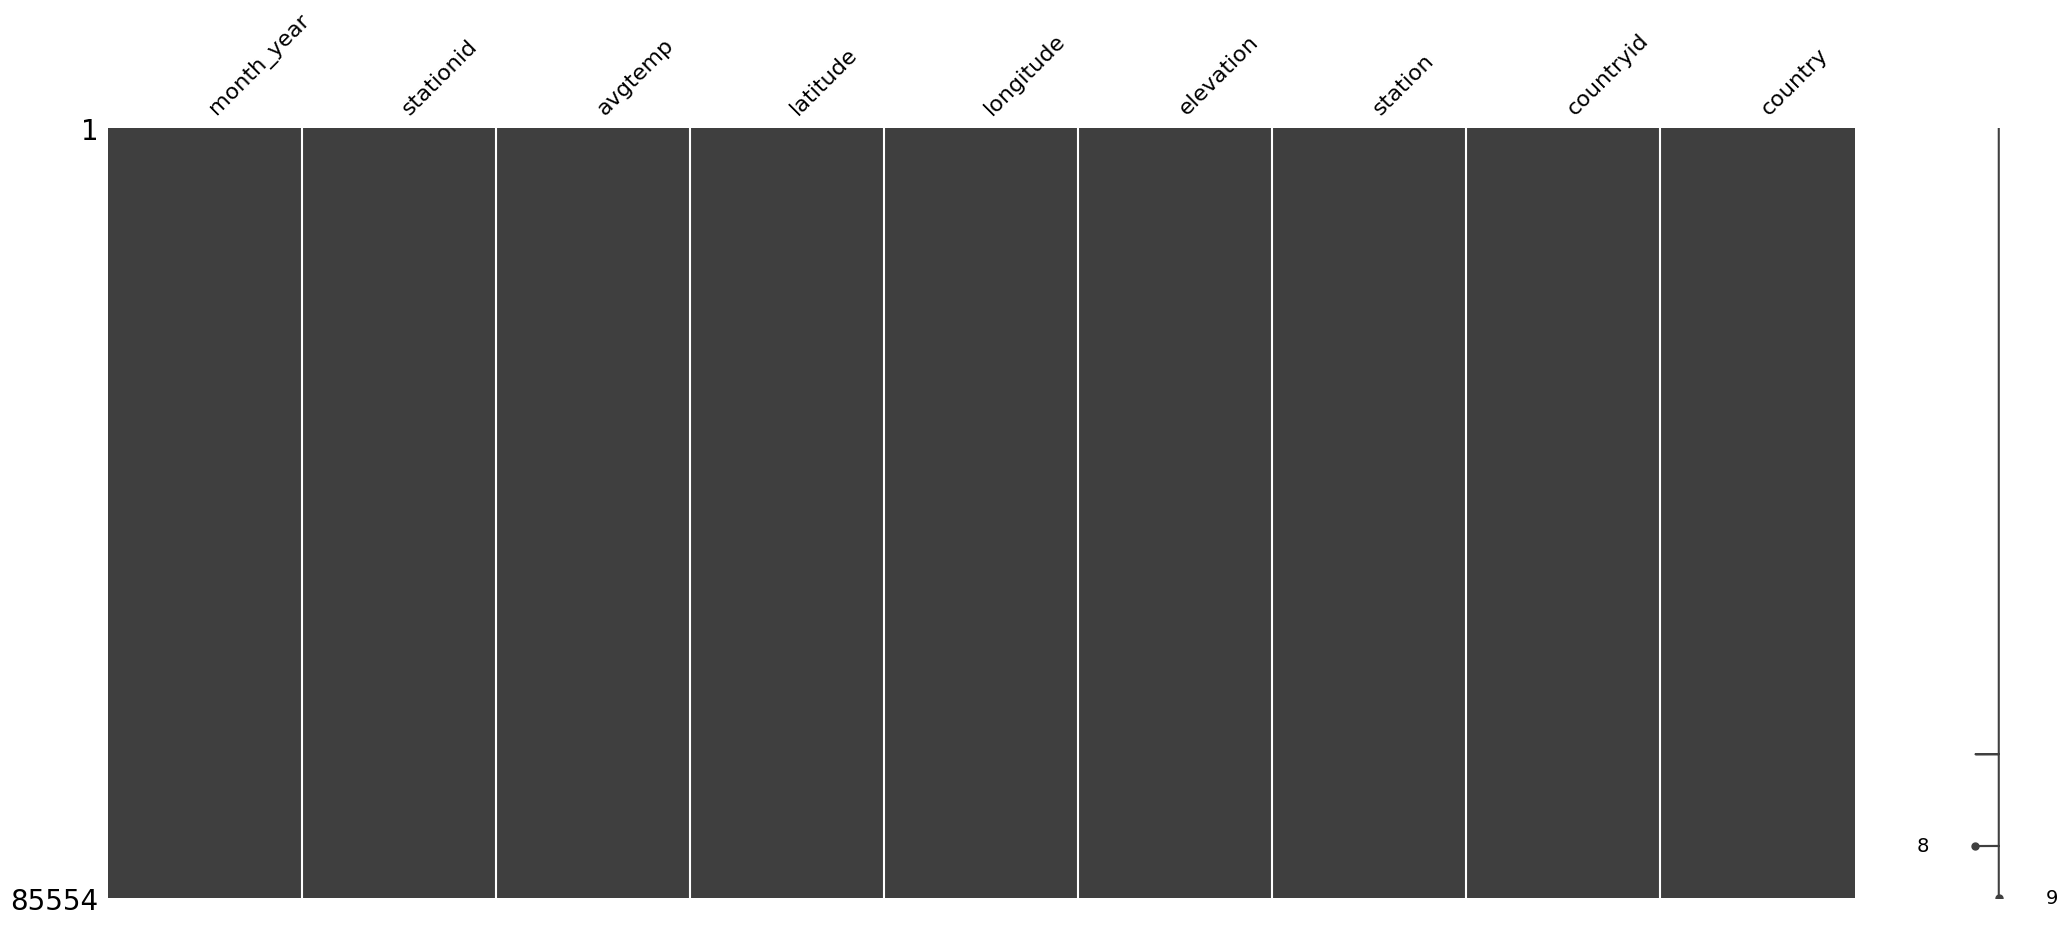

In [26]:
msno.matrix(landtemps)

# Obtenir un aperçu rapide sur les données.
- Afficher les premières lignes.
- Afficher le type de données de toutes les colonnes, ainsi que le nombre de lignes et de colonnes

In [ ]:
landtemps.head(7)

,month_year,stationid,avgtemp,latitude,longitude,elevation,station,countryid,country
0,2000-04-01,USS0010K01S,5.27,39.90,-110.75,"2,773.70",INDIAN_CANYON,US,United States
1,1940-05-01,CI000085406,18.04,-18.35,-70.33,58.00,ARICA,CI,Chile
2,2013-12-01,USC00036376,6.22,34.37,-91.12,61.00,SAINT_CHARLES,US,United States
3,1963-02-01,ASN00024002,22.93,-34.28,140.60,65.50,BERRI_IRRIGATION,AS,Australia
4,2001-11-01,ASN00028007,NaN,-14.78,143.50,79.40,MUSGRAVE,AS,Australia
5,1991-04-01,USW00024151,5.59,42.15,-112.29,"1,362.50",MALAD_CITY,US,United States
6,1993-12-01,RSM00022641,-10.17,63.90,38.12,13.00,ONEGA,RS,Russia


In [ ]:
landtemps.dtypes

month_year    datetime64[ns]
stationid             object
avgtemp              float64
latitude             float64
longitude            float64
elevation            float64
station               object
countryid             object
country               object
dtype: object

In [ ]:
landtemps.shape

(100000, 9)

In [ ]:
landtemps.rename(columns={'month_year':'measuredate'}, inplace=True)
landtemps.dtypes
landtemps.avgtemp.describe()

count   85,554.00
mean        10.92
std         11.52
min        -70.70
25%          3.46
50%         12.22
75%         19.57
max         39.95
Name: avgtemp, dtype: float64

In [ ]:
landtemps.longitude.describe()

count   100,000.00
mean        -38.12
std          84.30
min        -179.98
25%        -101.66
50%         -79.57
75%          17.53
max         179.75
Name: longitude, dtype: float64

 # Donner un meilleur nom à la colonne de date et afficher les statistiques récapitulatives pour la température mensuelle moyenne

# Rechercher les valeurs manquantes pour chaque colonne.
- Utiliser isnull , qui renvoie Vrai pour chaque valeur manquante pour chaque colonne, et False lorsqu'elle n'est pas manquante.
- Enchaîner ceci avec sum pour compter les valeurs manquantes pour chaque colonne.
- Lorsque vous travaillez avec des valeurs booléennes, sum traite True comme 1 et False comme 0

In [ ]:
landtemps.isnull().sum()

measuredate        0
stationid          0
avgtemp        14446
latitude           0
longitude          0
elevation          0
station            0
countryid          0
country            5
dtype: int64

# Supprimer les lignes avec des données manquantes pour avgtemp

- Utiliser le paramètre subset pour indiquer à dropna de supprimer les lignes où avgtemp est manquant.
- Définir inplace à True.
- Utiliser l'attribut shape pour obtenir le nombre de lignes et de colonnes

In [8]:
# remove rows with missing values
landtemps.dropna(subset=['avgtemp'], inplace=True)


In [9]:
#Pourcentage des donnees supprimee
100*(landtemps.shape[0]-landtemps.dropna().shape[0])/landtemps.shape[0]

0.0023377048413867267

# Importation de fichier EXCEL

- Sélectionner la feuille contenant les données dont nous avons besoin, mais ignorer les colonnes et les lignes que nous ne voulons pas.
- Utiliser le paramètre sheet_name pour spécifier la feuille.
- Définir skiprows à 4 et skipfooter à 1 pour ignorer les quatre premières lignes et la dernière ligne.
- Fournissons des valeurs pour usecols afin d'obtenir les données de la colonne A et des colonnes C à T (la colonne B est vide).
- Utilisez head pour afficher les premières lignes

In [10]:
percapitaGDP = pd.read_excel("/content/drive/MyDrive/Labs_Data_Prep_2025_IA/lab/GDPpercapita.xlsx",
   sheet_name="OECD.Stat export", # Choisir la feuille qu'on veut utiliser car un excel peut contenir plusieurs feuilles
   skiprows=4, # Ignorer les premieres lignes
   skipfooter=1, # Ignorer le derriere ligne
   usecols="A,C:T") # Importer le col A, C-->T

<Axes: >

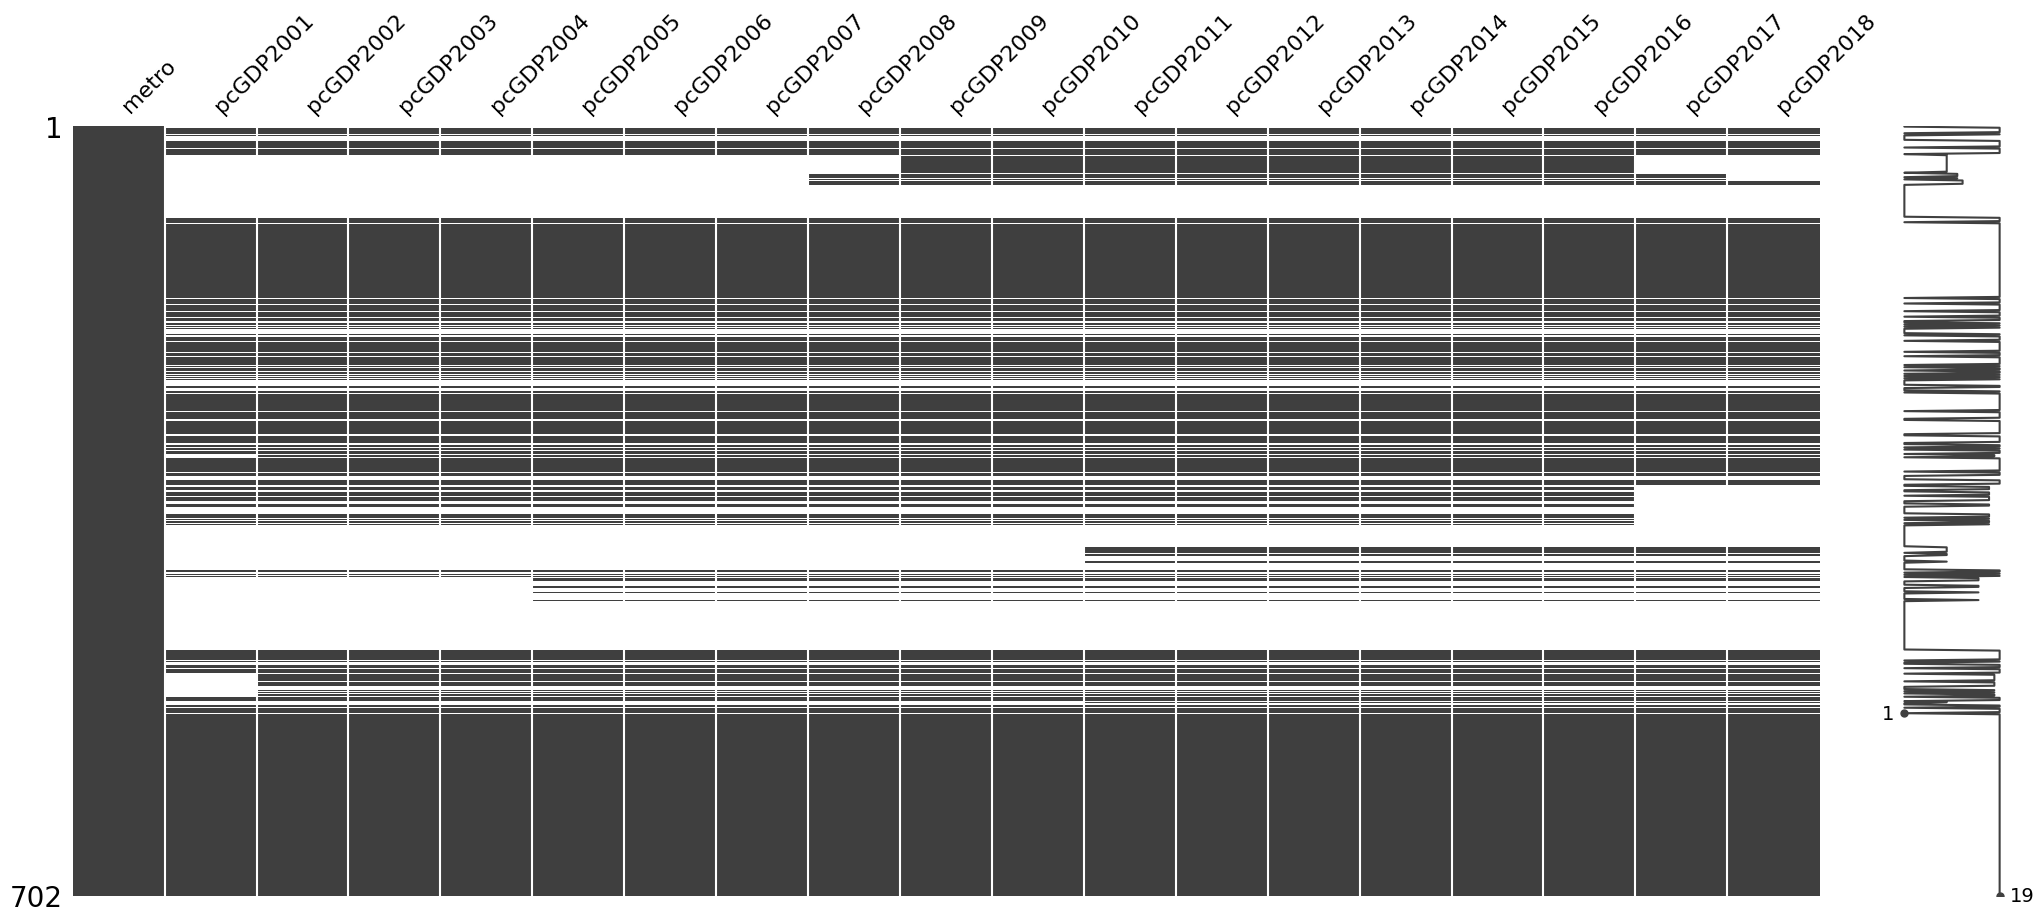

In [27]:
msno.matrix(percapitaGDP)

In [11]:
percapitaGDP.head(10)

,Year,2001,2002,2003,2004,...,2014,2015,2016,2017,2018
0,Metropolitan areas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,AUS: Australia,..,..,..,..,...,..,..,..,..,..
2,AUS01: Greater Sydney,43313,44008,45424,45837,...,48510,50075,50519,50578,49860
3,AUS02: Greater Melbourne,40125,40894,41602,42188,...,42114,42928,42671,43025,42674
4,AUS03: Greater Brisbane,37580,37564,39080,40762,...,43754,44388,45723,46876,46640
5,AUS04: Greater Perth,45713,47371,48719,51020,...,70395,66544,66032,66424,70390
6,AUS05: Greater Adelaide,36505,37194,37634,37399,...,40306,40295,39737,40115,39924
7,AUS06: Gold Coast,..,..,..,..,...,..,..,..,..,..
8,AUS07: Canberra,41465,44028,44814,45675,...,54503,56421,55979,56301,55971
9,AUS08: Newcastle,..,..,..,..,...,..,..,..,..,..


In [ ]:
percapitaGDP.shape

(702, 19)

Utilisez la méthode info pour visualiser les types de données et le nombre de données non nulles

In [ ]:
percapitaGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    702 non-null    object
 1   2001    701 non-null    object
 2   2002    701 non-null    object
 3   2003    701 non-null    object
 4   2004    701 non-null    object
 5   2005    701 non-null    object
 6   2006    701 non-null    object
 7   2007    701 non-null    object
 8   2008    701 non-null    object
 9   2009    701 non-null    object
 10  2010    701 non-null    object
 11  2011    701 non-null    object
 12  2012    701 non-null    object
 13  2013    701 non-null    object
 14  2014    701 non-null    object
 15  2015    701 non-null    object
 16  2016    701 non-null    object
 17  2017    701 non-null    object
 18  2018    701 non-null    object
dtypes: object(19)
memory usage: 104.3+ KB


A retenir que les types chaine de caracteres sont toutes des 'object'

Donner un nom approprié à la colonne des régions métropolitaines (Year to
metro).

In [12]:
percapitaGDP.rename(columns={'Year':'metro'}, inplace=True)

In [13]:
percapitaGDP

,metro,2001,2002,2003,2004,...,2014,2015,2016,2017,2018
0,Metropolitan areas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,AUS: Australia,..,..,..,..,...,..,..,..,..,..
2,AUS01: Greater Sydney,43313,44008,45424,45837,...,48510,50075,50519,50578,49860
3,AUS02: Greater Melbourne,40125,40894,41602,42188,...,42114,42928,42671,43025,42674
4,AUS03: Greater Brisbane,37580,37564,39080,40762,...,43754,44388,45723,46876,46640
...,...,...,...,...,...,...,...,...,...,...,...
697,USA164: Linn,53047,51751,54894,58660,...,67125,69490,69645,67553,68683
698,USA165: Lafayette (IN),38057,38723,39173,40412,...,41680,41763,42370,42562,44206
699,USA167: Weber,34592,34997,35587,35776,...,37418,39144,39950,40846,40930
700,USA169: Cass,44597,46856,49043,49134,...,57475,57402,56600,55201,56094


- Il y a des espaces supplémentaires avant les valeurs métropolitaines dans certains cas, et des espaces supplémentaires après les valeurs métropolitaines dans d'autres cas.
- Nous pouvons vérifier la présence d'espaces avant avec startswith(' '),
- puis utiliser any pour établir s'il y a une ou plusieurs occasions où le premier caractère est blanc.

In [14]:
percapitaGDP.metro.str.startswith(' ').any()
percapitaGDP.metro.str.endswith(' ').any()
percapitaGDP.metro = percapitaGDP.metro.str.strip()

In [15]:
percapitaGDP

,metro,2001,2002,2003,2004,...,2014,2015,2016,2017,2018
0,Metropolitan areas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,AUS: Australia,..,..,..,..,...,..,..,..,..,..
2,AUS01: Greater Sydney,43313,44008,45424,45837,...,48510,50075,50519,50578,49860
3,AUS02: Greater Melbourne,40125,40894,41602,42188,...,42114,42928,42671,43025,42674
4,AUS03: Greater Brisbane,37580,37564,39080,40762,...,43754,44388,45723,46876,46640
...,...,...,...,...,...,...,...,...,...,...,...
697,USA164: Linn,53047,51751,54894,58660,...,67125,69490,69645,67553,68683
698,USA165: Lafayette (IN),38057,38723,39173,40412,...,41680,41763,42370,42562,44206
699,USA167: Weber,34592,34997,35587,35776,...,37418,39144,39950,40846,40930
700,USA169: Cass,44597,46856,49043,49134,...,57475,57402,56600,55201,56094


- Nous pouvons utiliser endswith(' ') pour examiner les espaces à la fin

- Nous utilisons strip pour supprimer les espaces initiaux et finaux

- Itérer sur toutes les colonnes d'année (2001-2018) et convertir le type de données d'objet à flottant
- Coerce la conversion même lorsqu'il y a des données de type caractère ... dans cet exemple
- Nous voulons que les valeurs de caractères dans ces colonnes deviennent manquantes, ce qui est le cas
- Renommer les colonnes d'année pour mieux re
éter les données dans ces colonnes

In [16]:
for col in percapitaGDP.columns[1:]:
  percapitaGDP[col] = pd.to_numeric(percapitaGDP[col], errors='coerce')
  percapitaGDP.rename(columns={col:'pcGDP'+col}, inplace=True)

In [17]:
percapitaGDP

,metro,pcGDP2001,pcGDP2002,pcGDP2003,pcGDP2004,...,pcGDP2014,pcGDP2015,pcGDP2016,pcGDP2017,pcGDP2018
0,Metropolitan areas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,AUS: Australia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,AUS01: Greater Sydney,"43,313.00","44,008.00","45,424.00","45,837.00",...,"48,510.00","50,075.00","50,519.00","50,578.00","49,860.00"
3,AUS02: Greater Melbourne,"40,125.00","40,894.00","41,602.00","42,188.00",...,"42,114.00","42,928.00","42,671.00","43,025.00","42,674.00"
4,AUS03: Greater Brisbane,"37,580.00","37,564.00","39,080.00","40,762.00",...,"43,754.00","44,388.00","45,723.00","46,876.00","46,640.00"
...,...,...,...,...,...,...,...,...,...,...,...
697,USA164: Linn,"53,047.00","51,751.00","54,894.00","58,660.00",...,"67,125.00","69,490.00","69,645.00","67,553.00","68,683.00"
698,USA165: Lafayette (IN),"38,057.00","38,723.00","39,173.00","40,412.00",...,"41,680.00","41,763.00","42,370.00","42,562.00","44,206.00"
699,USA167: Weber,"34,592.00","34,997.00","35,587.00","35,776.00",...,"37,418.00","39,144.00","39,950.00","40,846.00","40,930.00"
700,USA169: Cass,"44,597.00","46,856.00","49,043.00","49,134.00",...,"57,475.00","57,402.00","56,600.00","55,201.00","56,094.00"


In [18]:
percapitaGDP.describe()

,pcGDP2001,pcGDP2002,pcGDP2003,pcGDP2004,pcGDP2005,...,pcGDP2014,pcGDP2015,pcGDP2016,pcGDP2017,pcGDP2018
count,424.00,440.00,440.00,440.00,447.00,...,480.00,480.00,480.00,445.00,441.00
mean,"41,263.66","41,015.07","41,553.36","42,473.02","42,881.14",...,"44,942.49","45,802.22","46,243.67","47,489.09","48,032.67"
std,"11,877.96","12,536.52","12,456.58","12,621.90","13,172.23",...,"14,421.62","14,948.68","14,938.55","15,463.80","15,719.73"
min,"10,988.00","11,435.00","11,969.00","12,777.00","13,062.00",...,"2,683.00","2,761.00","2,796.00","2,745.00","2,832.00"
25%,"33,139.25","32,636.00","33,284.75","33,864.50","33,735.50",...,"35,766.25","36,128.50","36,584.75","37,316.00","37,908.00"
50%,"39,543.50","39,683.50","40,390.50","41,200.50","41,609.00",...,"42,777.50","43,237.50","43,931.50","45,385.00","46,057.00"
75%,"47,971.75","48,611.00","49,354.75","50,468.25","51,025.00",...,"53,737.25","54,134.25","54,449.75","56,023.00","56,638.00"
max,"91,488.00","93,566.00","98,123.00","96,242.00","101,084.00",...,"121,011.00","121,623.00","117,879.00","122,242.00","127,468.00"


- Utiliser la méthode describe pour générer des statistiques récapitulatives pour toutes les données numériques dans  Data Frame

- Utiliser le paramètre subset de dropna pour inspecter toutes les colonnes, en commençant par la deuxième colonne jusqu'à la dernière colonne
- Utiliser how pour spécifier que nous voulons supprimer des lignes uniquement si toutes les colonnes spécifiées dans subset sont manquantes. item Utiliser shape pour afficher le nombre de lignes et de colonnes dans le Data Frame résultant

In [30]:
df_cleaned = percapitaGDP.dropna(subset=percapitaGDP.columns[1:], how='all', inplace=True)

- Définir l'index pour le Data Frame en utilisant la colonne de la région métropolitaine.
- Confirmer qu'il y a 480 valeurs valides pour metro et qu'il y a 480 valeurs uniques, avant de définir l'index.

In [20]:
df_cleaned.shape

(480, 19)

In [24]:
df_cleaned.set_index('metro', inplace=True)

In [23]:
df_cleaned

,pcGDP2001,pcGDP2002,pcGDP2003,pcGDP2004,pcGDP2005,...,pcGDP2014,pcGDP2015,pcGDP2016,pcGDP2017,pcGDP2018
metro,,,,,,,,,,,
AUS01: Greater Sydney,"43,313.00","44,008.00","45,424.00","45,837.00","45,423.00",...,"48,510.00","50,075.00","50,519.00","50,578.00","49,860.00"
AUS02: Greater Melbourne,"40,125.00","40,894.00","41,602.00","42,188.00","41,484.00",...,"42,114.00","42,928.00","42,671.00","43,025.00","42,674.00"
AUS03: Greater Brisbane,"37,580.00","37,564.00","39,080.00","40,762.00","42,976.00",...,"43,754.00","44,388.00","45,723.00","46,876.00","46,640.00"
AUS04: Greater Perth,"45,713.00","47,371.00","48,719.00","51,020.00","55,278.00",...,"70,395.00","66,544.00","66,032.00","66,424.00","70,390.00"
AUS05: Greater Adelaide,"36,505.00","37,194.00","37,634.00","37,399.00","37,604.00",...,"40,306.00","40,295.00","39,737.00","40,115.00","39,924.00"
...,...,...,...,...,...,...,...,...,...,...,...
USA164: Linn,"53,047.00","51,751.00","54,894.00","58,660.00","60,195.00",...,"67,125.00","69,490.00","69,645.00","67,553.00","68,683.00"
USA165: Lafayette (IN),"38,057.00","38,723.00","39,173.00","40,412.00","40,285.00",...,"41,680.00","41,763.00","42,370.00","42,562.00","44,206.00"
USA167: Weber,"34,592.00","34,997.00","35,587.00","35,776.00","37,613.00",...,"37,418.00","39,144.00","39,950.00","40,846.00","40,930.00"


In [29]:
df_cleaned.shape[0]/percapitaGDP.shape[0]

0.6837606837606838

# Importer a partir d'une base de données SQL
## Creer une connexion  la base de donnee en question